In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


## Data Loading

In [ ]:
train_df = pd.read_csv("train_land_cover_assignment.csv")
test_df = pd.read_csv("test_land_cover_assignment.csv")

In [ ]:
# Convert the dataframe to a GeoDataFrame
train_gdf = gpd.GeoDataFrame(
    train_df,

)
test_gdf = gpd.GeoDataFrame(
    test_df,

)

In [94]:
train_gdf.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim,landcover
0,1548937,7.387687,-4.780390,0.0,-2.714375e+06,321874.969864,1.4900,262,1006,58,...,5052.299805,853.451416,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082,2
1,1548936,8.690266,-5.770243,0.0,-2.812625e+06,474124.973063,1.2925,257,1118,70,...,5316.700195,933.074402,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431,1
2,1548935,8.518763,-2.808147,0.0,-2.495125e+06,440374.986977,1.3050,265,930,66,...,4519.700195,1186.817627,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131,1
3,1548934,8.637725,-3.048867,0.0,-2.520375e+06,454875.008083,1.3275,263,875,67,...,3439.800049,910.979309,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363,1
4,1548933,7.993474,-6.044227,0.0,-2.846625e+06,396624.944149,1.4200,260,1073,60,...,5226.899902,802.602661,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859,1


In [ ]:
test_gdf.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,1548905,4.824505,-7.522892,NaN,-3.023125e+06,44125.021587,1.4075,250,2564,46,...,-7.524098,12909.700195,870.217346,5.025,0.719068,0.007398,4.093175,64.50,23.50,9.168183
1,1548829,5.457730,-5.010404,NaN,-2.749125e+06,104624.973824,1.6350,261,1378,71,...,-5.011604,12288.299805,839.143616,4.850,0.724049,0.007270,0.487844,65.75,13.00,7.896024
2,1548811,5.081743,-7.148626,NaN,-2.981625e+06,71625.015246,1.5825,247,1704,46,...,-7.149833,13374.500000,763.726135,5.100,0.720274,0.006467,2.113945,52.00,23.25,7.606022
3,1548806,5.673164,-4.171414,NaN,-2.657375e+06,125374.968207,1.7350,261,1700,68,...,-4.172613,11717.200195,814.182434,5.125,0.724026,0.007111,0.962922,59.75,15.00,8.471351
4,1548798,4.665885,-7.040600,NaN,-2.971875e+06,23875.013622,1.5925,259,1724,61,...,-7.041802,3474.800049,1809.494385,4.950,0.716632,0.007030,0.779259,70.50,15.75,13.725027


In [ ]:
train_gdf.shape,test_gdf.shape


((15856, 49), (35, 46))

In [ ]:
train_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15856 entries, 0 to 15855
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     15856 non-null  int64  
 1   lat       15856 non-null  float64
 2   lon       15856 non-null  float64
 3   building  15856 non-null  object 
 4   cropland  15856 non-null  object 
 5   wcover    15856 non-null  object 
 6   bcount    15856 non-null  float64
 7   x         15856 non-null  float64
 8   y         15856 non-null  float64
 9   bd20      15811 non-null  float64
 10  bio1      15856 non-null  int64  
 11  bio12     15856 non-null  int64  
 12  bio7      15856 non-null  int64  
 13  bio15     15856 non-null  int64  
 14  cec20     15811 non-null  float64
 15  dipa      15856 non-null  float64
 16  dni       15856 non-null  float64
 17  dnlt      15856 non-null  float64
 18  dnpa      15856 non-null  float64
 19  dor1      15856 non-null  float64
 20  dor2      15856 non-

In [ ]:
test_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   subid   35 non-null     int64  
 1   lat     35 non-null     float64
 2   lon     35 non-null     float64
 3   bcount  0 non-null      float64
 4   x       35 non-null     float64
 5   y       35 non-null     float64
 6   bd20    35 non-null     float64
 7   bio1    35 non-null     int64  
 8   bio12   35 non-null     int64  
 9   bio7    35 non-null     int64  
 10  bio15   35 non-null     int64  
 11  cec20   35 non-null     float64
 12  dipa    35 non-null     float64
 13  dni     35 non-null     float64
 14  dnlt    35 non-null     float64
 15  dnpa    35 non-null     float64
 16  dor1    35 non-null     float64
 17  dor2    35 non-null     float64
 18  fpara   35 non-null     float64
 19  fpars   35 non-null     float64
 20  lcc10   35 non-null     int64  
 21  lcc11   35 non-null     int64  
 

In [ ]:
train_gdf.describe().T

,count,mean,std,min,25%,50%,75%,max
subid,15856.0,1.540573e+06,4805.508182,1.532219e+06,1.536478e+06,1.540446e+06,1.544915e+06,1.548937e+06
lat,15856.0,7.639857e+00,1.476289,4.384086e+00,6.425833e+00,7.680448e+00,8.863336e+00,1.070230e+01
lon,15856.0,-5.557888e+00,1.500323,-8.583182e+00,-6.827483e+00,-5.652635e+00,-4.270957e+00,-2.514808e+00
bcount,15856.0,1.922931e+00,13.942902,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+02
x,15856.0,-2.795617e+06,161307.162172,-3.128125e+06,-2.932875e+06,-2.806125e+06,-2.658562e+06,-2.465125e+06
y,15856.0,3.543322e+05,167481.073066,-6.374980e+03,2.173750e+05,3.588750e+05,4.921250e+05,7.043751e+05
bd20,15811.0,1.436390e+00,0.163676,1.057500e+00,1.287500e+00,1.427500e+00,1.575000e+00,1.865000e+00
bio1,15856.0,2.589067e+02,6.578450,1.980000e+02,2.550000e+02,2.590000e+02,2.630000e+02,2.770000e+02
bio12,15856.0,1.276894e+03,253.890839,8.020000e+02,1.096000e+03,1.225000e+03,1.408000e+03,2.586000e+03
bio7,15856.0,6.590918e+01,13.210307,4.300000e+01,5.700000e+01,6.200000e+01,7.300000e+01,1.050000e+02


In [ ]:
test_gdf.describe().T

,count,mean,std,min,25%,50%,75%,max
subid,35.0,1.545269e+06,5136.101636,1.534108e+06,1.543100e+06,1.548461e+06,1.548604e+06,1.548905e+06
lat,35.0,5.737482e+00,1.240670,4.665885e+00,5.023485e+00,5.399041e+00,5.675503e+00,9.389813e+00
lon,35.0,-5.671112e+00,1.277960,-7.703526e+00,-7.056182e+00,-5.647431e+00,-4.932149e+00,-3.307357e+00
bcount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,35.0,-2.818725e+06,141959.505621,-3.034875e+06,-2.973000e+06,-2.818125e+06,-2.738625e+06,-2.547125e+06
y,35.0,1.391607e+05,136837.740316,2.387501e+04,6.374996e+04,1.003749e+05,1.256250e+05,5.418750e+05
bd20,35.0,1.582500e+00,0.132729,1.235000e+00,1.565000e+00,1.595000e+00,1.663750e+00,1.735000e+00
bio1,35.0,2.571429e+02,5.041842,2.470000e+02,2.530000e+02,2.590000e+02,2.605000e+02,2.690000e+02
bio12,35.0,1.568800e+03,333.588228,9.510000e+02,1.365500e+03,1.576000e+03,1.745500e+03,2.564000e+03
bio7,35.0,6.468571e+01,11.362403,4.600000e+01,5.500000e+01,6.700000e+01,7.300000e+01,9.100000e+01


In [ ]:
categorical_cols = train_gdf.select_dtypes(include=['object']).columns
for col in categorical_cols:
       print(f"Column: {col}")
       print(train_gdf[col].unique())
       print("\n")

Column: building
['No' 'Yes']


Column: cropland
['No' 'Yes']


Column: wcover
['>60%' '<30%' '>30%']




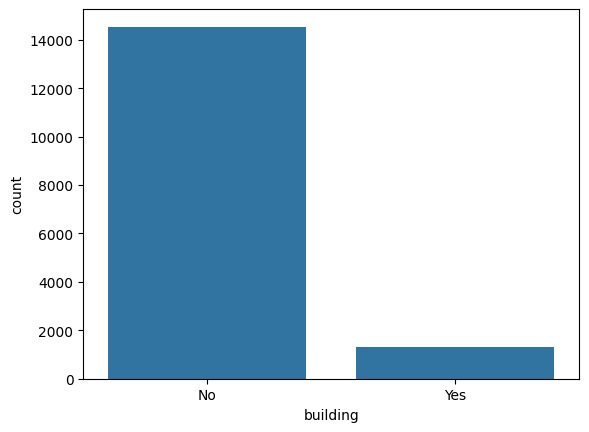

In [ ]:
# Distribution of building column
sns.countplot(x='building',data=train_gdf)
plt.show()

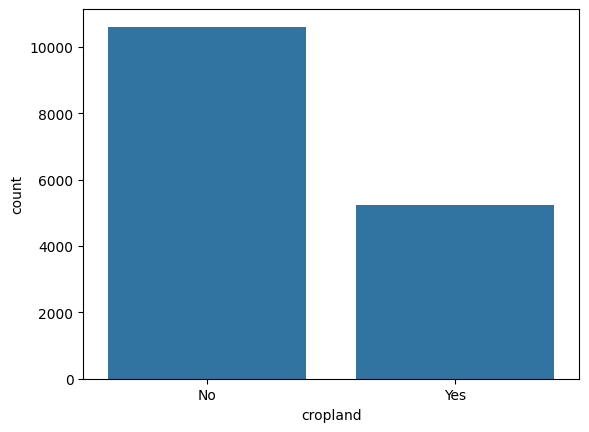

In [ ]:
# Distribution of cropland column
sns.countplot(x='cropland',data=train_gdf)
plt.show()

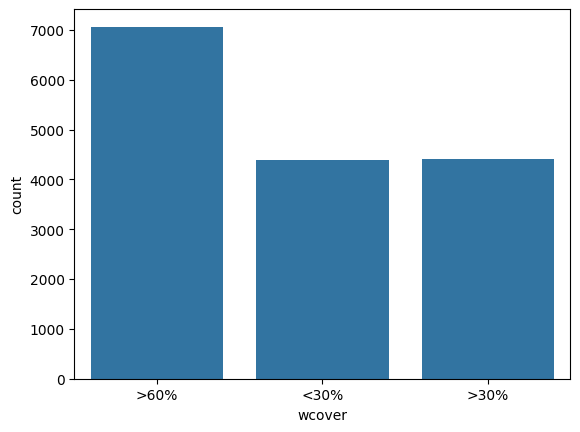

In [ ]:
# Distribution of cropland column
sns.countplot(x='wcover',data=train_gdf)
plt.show()

## Data Preprocessing

In [ ]:
## Data Preprocessing

In [ ]:
# Check for missing values in train dataset
train_gdf.isnull().sum()

,0
subid,0
lat,0
lon,0
building,0
cropland,0
wcover,0
bcount,0
x,0
y,0
bd20,45


In [ ]:
test_gdf.isnull().sum()

,0
subid,0
lat,0
lon,0
bcount,35
x,0
y,0
bd20,0
bio1,0
bio12,0
bio7,0


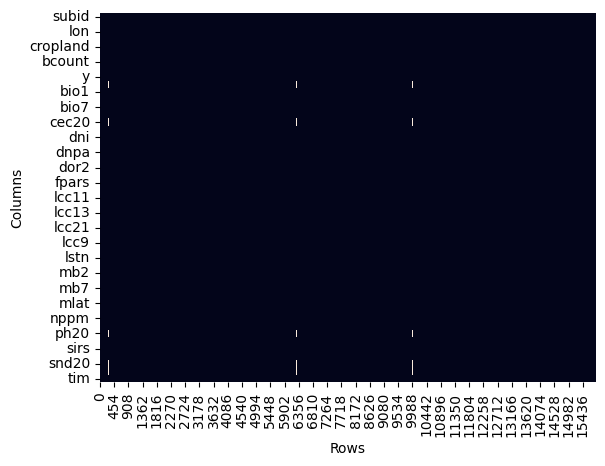

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(train_gdf.isna().transpose(), cbar=False, ax=ax)
plt. xlabel("Rows")
plt.ylabel("Columns")
plt.show()

In [ ]:
data_missing = train_gdf[~(train_gdf["bio1"].isna()) &
      (train_gdf["cec20"].isna()) &
      (train_gdf["ph20"].isna()) &
      (train_gdf["snd20"].isna())

]


In [ ]:
data_missing


,subid,lat,lon,building,cropland,wcover,bcount,x,y,bd20,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
274,1548652,9.816674,-7.556612,No,Yes,>30%,0.0,-2.995125e+06,611624.969164,NaN,...,-7.557865,3167.199951,649.226501,NaN,0.719814,0.008340,1.159993,NaN,NaN,10.925166
1015,1547878,5.314898,-4.463822,Yes,Yes,<30%,16.0,-2.690625e+06,86124.977145,NaN,...,-4.465019,6517.799805,767.447388,NaN,0.714374,0.007009,1.361649,NaN,NaN,12.056894
1075,1547818,5.288401,-4.462756,Yes,Yes,>60%,4.0,-2.690625e+06,83125.049204,NaN,...,-4.463953,0.000000,0.000000,NaN,0.713089,0.007029,3.180642,NaN,NaN,9.231565
1602,1547290,8.018872,-2.876379,No,Yes,>30%,0.0,-2.505375e+06,384375.019721,NaN,...,-2.877592,3601.600098,1178.735352,NaN,0.717368,0.006791,2.155771,NaN,NaN,10.159265
1783,1547108,5.174432,-5.313108,No,Yes,>60%,0.0,-2.783125e+06,73875.016724,NaN,...,-5.314307,0.000000,0.000000,NaN,0.000000,0.000000,0.786595,NaN,NaN,9.335908
1994,1546893,8.617977,-5.562886,No,No,>60%,0.0,-2.790875e+06,464874.941780,NaN,...,-5.564117,3951.300049,764.971619,NaN,0.713890,0.006768,0.939636,NaN,NaN,12.565793
2048,1546839,5.576609,-3.244662,Yes,Yes,>60%,2.0,-2.557375e+06,110625.051831,NaN,...,-3.245856,11518.700195,838.168518,NaN,0.000000,0.000000,0.869811,NaN,NaN,NaN
2058,1546829,5.315848,-4.674036,No,Yes,>60%,0.0,-2.713375e+06,87124.978607,NaN,...,-4.675234,6223.500000,742.037476,NaN,0.000000,0.000000,2.437808,NaN,NaN,9.594395
2341,1546543,6.741978,-6.974051,No,No,>60%,0.0,-2.954125e+06,259375.045445,NaN,...,-6.975271,0.000000,0.000000,NaN,0.718933,0.006714,2.179202,NaN,NaN,11.065211
2425,1546459,5.286561,-3.913424,Yes,Yes,<30%,12.0,-2.631125e+06,80625.033794,NaN,...,-3.914619,0.000000,0.000000,NaN,0.000000,0.000000,0.845901,NaN,NaN,10.865295


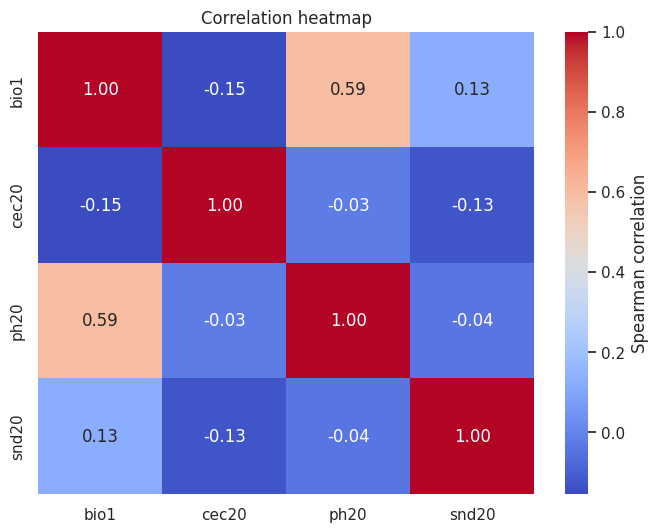

In [ ]:

columns_of_interest = ["bio1", "cec20", "ph20", "snd20"]
correlation_matrix = train_gdf[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

The heatmap shows that among the features there is low correlation , with the exceptio of, bio1 (temperature) and ph20 (soil pH) stand out for having a moderate correlation, while the others appear relatively uncorrelated in your dataset.



In [ ]:
data_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 274 to 15847
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     45 non-null     int64  
 1   lat       45 non-null     float64
 2   lon       45 non-null     float64
 3   building  45 non-null     object 
 4   cropland  45 non-null     object 
 5   wcover    45 non-null     object 
 6   bcount    45 non-null     float64
 7   x         45 non-null     float64
 8   y         45 non-null     float64
 9   bd20      0 non-null      float64
 10  bio1      45 non-null     int64  
 11  bio12     45 non-null     int64  
 12  bio7      45 non-null     int64  
 13  bio15     45 non-null     int64  
 14  cec20     0 non-null      float64
 15  dipa      45 non-null     float64
 16  dni       45 non-null     float64
 17  dnlt      45 non-null     float64
 18  dnpa      45 non-null     float64
 19  dor1      45 non-null     float64
 20  dor2      45 non-null     float64


In [ ]:
train_gdf = train_gdf[~(train_gdf["bio1"].isna()) &
      ~(train_gdf["cec20"].isna()) &
      ~(train_gdf["ph20"].isna()) &
      ~(train_gdf["snd20"].isna())

]

In [ ]:
train_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15811 entries, 0 to 15855
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     15811 non-null  int64  
 1   lat       15811 non-null  float64
 2   lon       15811 non-null  float64
 3   building  15811 non-null  object 
 4   cropland  15811 non-null  object 
 5   wcover    15811 non-null  object 
 6   bcount    15811 non-null  float64
 7   x         15811 non-null  float64
 8   y         15811 non-null  float64
 9   bd20      15811 non-null  float64
 10  bio1      15811 non-null  int64  
 11  bio12     15811 non-null  int64  
 12  bio7      15811 non-null  int64  
 13  bio15     15811 non-null  int64  
 14  cec20     15811 non-null  float64
 15  dipa      15811 non-null  float64
 16  dni       15811 non-null  float64
 17  dnlt      15811 non-null  float64
 18  dnpa      15811 non-null  float64
 19  dor1      15811 non-null  float64
 20  dor2      15811 non-null  float64

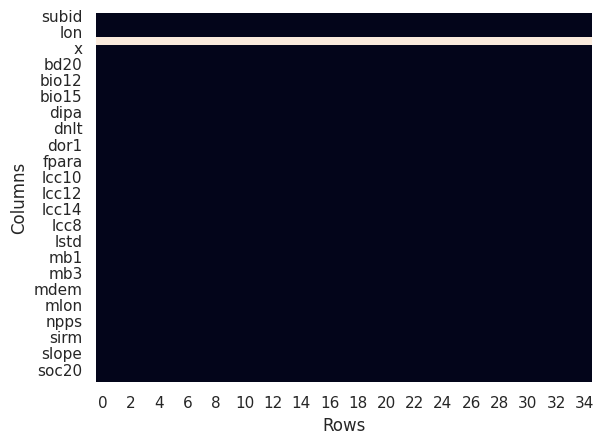

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
sns.heatmap(test_gdf.isna().transpose(), cbar=False, ax=ax)
plt. xlabel("Rows")
plt.ylabel("Columns")
plt.show()

## Deep dive into lstd (Average day-time land surface temp. (deg. C , 2001-2020)) and lstn columns (Average night-time land surface temp. (deg. C, 2001-2020))

In [ ]:
# 1. Identify the rows with missing values in lstd or lstn
missing_mask = train_gdf['lstd'].isnull() | train_gdf['lstn'].isnull()
missing_rows = train_gdf[missing_mask]
missing_rows[['subid', 'lat', 'lon', 'lstd', 'lstn']]

,subid,lat,lon,lstd,lstn
1591,1547301,5.201036,-3.336148,NaN,NaN
1785,1547106,5.158228,-4.750843,NaN,NaN
2633,1546251,5.233256,-4.518274,NaN,NaN
6733,1541643,5.225401,-5.308266,NaN,NaN
6850,1541525,5.211316,-5.157389,NaN,NaN
6914,1541461,5.307599,-4.124199,NaN,NaN
8800,1539574,5.302855,-4.431010,NaN,NaN
8833,1539541,5.210890,-4.346546,NaN,NaN
9698,1538676,5.327656,-4.120380,NaN,NaN
10601,1537772,4.432429,-7.323420,NaN,NaN


In [ ]:
# Check if the missing rows for lstd and lstn are the same
same_missing = (train_gdf['lstd'].isnull() == train_gdf['lstn'].isnull()).all()
print("Are the missing rows for lstd and lstn identical? ", same_missing)

Are the missing rows for lstd and lstn identical?  True


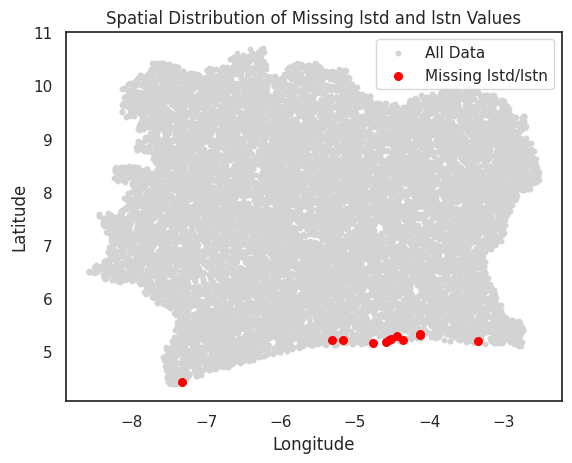

In [ ]:
# 2. Investigate spatial patterns by plotting the missing rows on a map
plt.figure()
# Plot all points in light gray
plt.scatter(train_gdf['lon'], train_gdf['lat'], c='lightgray', s=10, label='All Data')
# Highlight the points with missing lstd/lstn in red
plt.scatter(missing_rows['lon'], missing_rows['lat'], c='red', s=30, label='Missing lstd/lstn')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Missing lstd and lstn Values")
plt.legend()
plt.show()

The points are along or near the southern/southwestern coast, with one row farther west at (4.432429, -7.323420).
This could be caused by Persistent cloud cover, coastal influence, or a data-source retrieval issue (e.g., MODIS or other satellite-based products) might explain why day/night LST values were not retrieved for those specific pixels.

We will use KNNImputer, which will include latitude (lat), longitude (lon), and elevation (mdem), the imputer will look for the closest points and average their known LST values. This helps capture coastal vs inland differences better.

In [ ]:
from sklearn.impute import KNNImputer

# Select relevant columns
cols = ['lat', 'lon', 'mdem', 'bio1', 'mb1', 'mb7', 'lstd', 'lstn']

# Create a copy
df_knn = train_gdf[cols].copy()

# Initializee the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='distance')

# train the Imputer
imputed_data = imputer.fit_transform(df_knn)
# Have the imputed columns in the original dataframe
df_knn_imputed = pd.DataFrame(imputed_data, columns=cols, index=train_gdf.index)
train_gdf['lstd'] = df_knn_imputed['lstd']
train_gdf['lstn'] = df_knn_imputed['lstn']

In [ ]:
# Checking if there are any missing values

train_gdf.isna().sum()

,0
subid,0
lat,0
lon,0
building,0
cropland,0
wcover,0
bcount,0
x,0
y,0
bd20,0


In [ ]:
# Veryfying the missing values have been imputed
train_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15811 entries, 0 to 15855
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     15811 non-null  int64  
 1   lat       15811 non-null  float64
 2   lon       15811 non-null  float64
 3   building  15811 non-null  object 
 4   cropland  15811 non-null  object 
 5   wcover    15811 non-null  object 
 6   bcount    15811 non-null  float64
 7   x         15811 non-null  float64
 8   y         15811 non-null  float64
 9   bd20      15811 non-null  float64
 10  bio1      15811 non-null  int64  
 11  bio12     15811 non-null  int64  
 12  bio7      15811 non-null  int64  
 13  bio15     15811 non-null  int64  
 14  cec20     15811 non-null  float64
 15  dipa      15811 non-null  float64
 16  dni       15811 non-null  float64
 17  dnlt      15811 non-null  float64
 18  dnpa      15811 non-null  float64
 19  dor1      15811 non-null  float64
 20  dor2      15811 non-null  float64

In [ ]:
train_gdf[["lat","lon", "mlat","mlon"]].head(10)

,lat,lon,mlat,mlon
0,7.387687,-4.780390,7.388742,-4.781606
1,8.690266,-5.770243,8.691314,-5.771476
2,8.518763,-2.808147,8.519824,-2.809363
3,8.637725,-3.048867,8.638784,-3.050085
4,7.993474,-6.044227,7.994523,-6.045455
5,7.219553,-3.349626,7.220614,-3.350835
6,6.794609,-4.073888,6.795668,-4.075096
7,9.625816,-3.809691,9.626870,-3.810922
8,8.944514,-3.142914,8.945573,-3.144136
9,7.737685,-6.434330,7.738732,-6.435557


In [ ]:
# Compare lat vs. mlat
lat_diff = (train_gdf['lat'] - train_gdf['mlat']).abs()
lon_diff = (train_gdf['lon'] - train_gdf['mlon']).abs()

print("Mean absolute difference in latitude:", lat_diff.mean())
print("Mean absolute difference in longitude:", lon_diff.mean())

Mean absolute difference in latitude: 0.001051072155990653
Mean absolute difference in longitude: 0.0012222703553230398


The difference in latitude and longitude are too smll. According to GIS StackExchanage , practitionaers have noted that when differences are on the order of 0.001 (which typically equates to roughly 100-110 meters at most) it isnt necessary to switch coordinate systems unless the analysis demands extremely high spatial precision.


This approach is supported by GIS professionals who point out that differences at the 0.001° level are generally negligible for most analyses, as detailed in the Wikipedia article on Decimal Degrees and discussions on GIS StackExchange.(https://en.wikipedia.org/wiki/Decimal_degrees

In [ ]:
train_gdf = train_gdf.drop(columns=['mlat', 'mlon'])
test_gdf = test_gdf.drop(columns=['mlat', 'mlon'])


## Deep dive on the columns with no description

In [ ]:
train_gdf[["x","y", "bcount","dnlt","nppm","sirs"]].head(10)

,x,y,bcount,dnlt,nppm,sirs
0,-2.714375e+06,321874.969864,0.0,0.500000,5052.299805,0.008259
1,-2.812625e+06,474124.973063,0.0,3.913119,5316.700195,0.007242
2,-2.495125e+06,440374.986977,0.0,7.615773,4519.700195,0.006744
3,-2.520375e+06,454875.008083,0.0,7.591113,3439.800049,0.007917
4,-2.846625e+06,396624.944149,0.0,0.000000,5226.899902,0.007022
5,-2.560875e+06,296374.982792,0.0,1.250000,4088.899902,0.007156
6,-2.641375e+06,251625.046786,0.0,0.000000,5630.600098,0.007713
7,-2.595875e+06,569875.044968,0.0,3.691206,2612.500000,0.007078
8,-2.528625e+06,489875.029340,0.0,3.010399,3277.800049,0.007249
9,-2.890125e+06,369625.020345,0.0,3.250000,5506.899902,0.006950


In [ ]:
# Checking categories in the bcount
train_gdf["bcount"].value_counts()

,count
bcount,
0.0,14509
1.0,277
2.0,156
3.0,128
4.0,70
...,...
142.0,1
84.0,1
90.0,1


In [ ]:
# Our undocumented columns of interest:
undoc_cols = ['x', 'y', 'bcount', 'dnlt', 'nppm', 'sirs']


In [ ]:
# Compute the Pearson correlation matrix
corr_matrix = train_gdf[undoc_cols].corr(method='pearson')
print("Correlation matrix:\n", corr_matrix)

Correlation matrix:
                x         y    bcount      dnlt      nppm      sirs
x       1.000000 -0.004533 -0.020441  0.006522 -0.305928  0.042232
y      -0.004533  1.000000 -0.053686  0.030446 -0.464429 -0.128165
bcount -0.020441 -0.053686  1.000000 -0.076438 -0.030680  0.006147
dnlt    0.006522  0.030446 -0.076438  1.000000  0.093515 -0.055916
nppm   -0.305928 -0.464429 -0.030680  0.093515  1.000000  0.074080
sirs    0.042232 -0.128165  0.006147 -0.055916  0.074080  1.000000


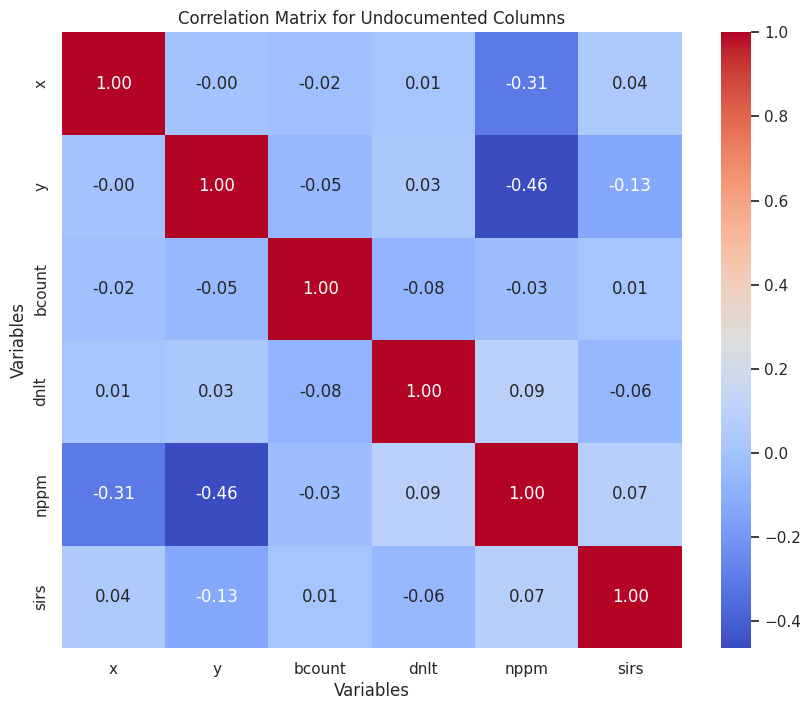

In [ ]:
# Visualize the matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Undocumented Columns")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

The columns do not contain strong correlation, which means they are independent. We will retain the columns, and then evaluate their significance on the model perfomance, using feature importance.

## Checking for Duplicates

In [ ]:
train_gdf.duplicated().sum()

0

In [ ]:
test_gdf.duplicated().sum()

0

In [ ]:
train_gdf.head()

,subid,lat,lon,building,cropland,wcover,bcount,x,y,bd20,...,mdem,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,1548937,7.387687,-4.780390,No,No,>60%,0.0,-2.714375e+06,321874.969864,1.4900,...,199,5052.299805,853.451416,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082
1,1548936,8.690266,-5.770243,No,Yes,<30%,0.0,-2.812625e+06,474124.973063,1.2925,...,362,5316.700195,933.074402,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431
2,1548935,8.518763,-2.808147,No,Yes,<30%,0.0,-2.495125e+06,440374.986977,1.3050,...,288,4519.700195,1186.817627,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131
3,1548934,8.637725,-3.048867,No,No,<30%,0.0,-2.520375e+06,454875.008083,1.3275,...,320,3439.800049,910.979309,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363
4,1548933,7.993474,-6.044227,No,No,<30%,0.0,-2.846625e+06,396624.944149,1.4200,...,265,5226.899902,802.602661,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859


In [ ]:
def get_landcover(row):
    # Prioritize building if "Yes"
    if str(row['building']).strip().lower() == 'yes':
        return 'building'
    # Next, prioritize cropland if "Yes"
    elif str(row['cropland']).strip().lower() == 'yes':
        return 'cropland'
    # Next, if wcover is clearly >60%, assign woody
    elif '>60' in str(row['wcover']):
        return 'woody'
    else:
        # Use wcover to decide further:
        if '>30' in str(row['wcover']):
            return 'woody'
        else:
            return 'cropland'


In [ ]:
# Create a landcover column
train_gdf['landcover'] = train_gdf.apply(get_landcover, axis=1)

In [ ]:
train_gdf['landcover'].value_counts()

,count
landcover,
woody,7511
cropland,6992
building,1308


In [ ]:
# Drop the original target columns if no longer needed
train_gdf = train_gdf.drop(columns=['building', 'cropland', 'wcover'])

In [ ]:
train_gdf.columns

Index(['subid', 'lat', 'lon', 'bcount', 'x', 'y', 'bd20', 'bio1', 'bio12',
       'bio7', 'bio15', 'cec20', 'dipa', 'dni', 'dnlt', 'dnpa', 'dor1', 'dor2',
       'fpara', 'fpars', 'lcc10', 'lcc11', 'lcc12', 'lcc13', 'lcc14', 'lcc21',
       'lcc8', 'lcc9', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'mdem',
       'nppm', 'npps', 'ph20', 'sirm', 'sirs', 'slope', 'snd20', 'soc20',
       'tim', 'landcover'],
      dtype='object')

In [ ]:
test_gdf.columns

Index(['subid', 'lat', 'lon', 'bcount', 'x', 'y', 'bd20', 'bio1', 'bio12',
       'bio7', 'bio15', 'cec20', 'dipa', 'dni', 'dnlt', 'dnpa', 'dor1', 'dor2',
       'fpara', 'fpars', 'lcc10', 'lcc11', 'lcc12', 'lcc13', 'lcc14', 'lcc21',
       'lcc8', 'lcc9', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'mdem',
       'nppm', 'npps', 'ph20', 'sirm', 'sirs', 'slope', 'snd20', 'soc20',
       'tim'],
      dtype='object')

In [ ]:
train_gdf.shape, test_gdf.shape

((15811, 45), (35, 44))

## Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding on landcover column
label_encoder = LabelEncoder()
train_gdf['landcover'] = label_encoder.fit_transform(train_gdf['landcover'])

In [ ]:
train_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15811 entries, 0 to 15855
Data columns (total 45 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subid      15811 non-null  int64  
 1   lat        15811 non-null  float64
 2   lon        15811 non-null  float64
 3   bcount     15811 non-null  float64
 4   x          15811 non-null  float64
 5   y          15811 non-null  float64
 6   bd20       15811 non-null  float64
 7   bio1       15811 non-null  int64  
 8   bio12      15811 non-null  int64  
 9   bio7       15811 non-null  int64  
 10  bio15      15811 non-null  int64  
 11  cec20      15811 non-null  float64
 12  dipa       15811 non-null  float64
 13  dni        15811 non-null  float64
 14  dnlt       15811 non-null  float64
 15  dnpa       15811 non-null  float64
 16  dor1       15811 non-null  float64
 17  dor2       15811 non-null  float64
 18  fpara      15811 non-null  float64
 19  fpars      15811 non-null  float64
 20  lcc10      

## Splitting the dataset into features and target variable

In [ ]:
X = train_gdf.drop(columns=['subid', 'landcover'])
y = train_gdf['landcover']

In [ ]:
X.head()

,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,bio15,...,mdem,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,7.387687,-4.780390,0.0,-2.714375e+06,321874.969864,1.4900,262,1006,58,128,...,199,5052.299805,853.451416,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082
1,8.690266,-5.770243,0.0,-2.812625e+06,474124.973063,1.2925,257,1118,70,162,...,362,5316.700195,933.074402,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431
2,8.518763,-2.808147,0.0,-2.495125e+06,440374.986977,1.3050,265,930,66,154,...,288,4519.700195,1186.817627,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131
3,8.637725,-3.048867,0.0,-2.520375e+06,454875.008083,1.3275,263,875,67,156,...,320,3439.800049,910.979309,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363
4,7.993474,-6.044227,0.0,-2.846625e+06,396624.944149,1.4200,260,1073,60,146,...,265,5226.899902,802.602661,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859


In [ ]:
y.head()

,landcover
0,2
1,1
2,1
3,1
4,1


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
X_train.shape, X_eval.shape, y_train.shape, y_eval.shape

((12648, 43), (3163, 43), (12648,), (3163,))

## Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

#Cloning the standardscaler class
scaler =StandardScaler().set_output(transform="pandas")

#Fitting and transforming the selected columns in the training data set
X_train_scaled = X_train.copy()
X_train_scaled=scaler.fit_transform(X_train)

#Transforming the selected columns  in the evaluation dataset
X_eval_scaled=X_eval.copy()
X_eval_scaled = scaler.transform(X_eval)

In [ ]:
X_train_scaled.head()

,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,bio15,...,mdem,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
4765,-1.064645,-0.355011,-0.138254,-0.416325,-1.049024,0.334173,-0.893642,0.657599,-1.427674,-0.905092,...,-0.450011,0.409156,-2.292061,0.618189,0.126979,1.164402,-0.446802,0.523376,0.048235,0.727310
57,1.505847,-1.417594,-0.138254,-1.318869,1.571992,-1.399952,0.015246,0.247609,2.120760,1.580276,...,1.155479,-0.926625,-0.552530,0.037078,0.097044,-0.561604,-0.011421,-2.219531,-0.502208,-0.434783
11232,0.143553,-0.848583,-0.138254,-0.845073,0.180791,-1.215797,-0.439198,0.271262,-0.219697,0.365835,...,0.409494,0.559630,0.636649,0.981385,0.095886,-0.570367,-0.683128,-1.019509,0.094105,0.825519
9055,0.399609,1.277745,-0.138254,1.295557,0.342177,-0.387101,0.621172,-0.659101,-0.370694,0.394078,...,-0.068910,-0.175019,0.307333,1.126663,0.035358,-0.504388,-0.008357,1.003385,0.139975,0.044575
5405,-1.207918,1.041463,-0.138254,0.980210,-1.247768,0.855945,0.166728,1.075474,-0.446193,-1.413463,...,-1.585206,1.656435,0.328103,-1.706259,0.110011,0.876726,-0.628777,0.386231,0.277586,-0.569101


## Handling Imbalance in the Target variable

The basic idea behind SMOTE is to create new minority class samples by randomly selecting one or more of the k-nearest neighbors of each minority class sample, and using them to create new synthetic samples (Nababan et al., 2023).



In [ ]:
from imblearn.over_sampling import SMOTE
print("Original class distribution:")
print(y_train.value_counts())

#Cloning the class SMOTE and specifying the sampling strategy
smote = SMOTE(random_state=32)
X_resampled, y_resampled= smote.fit_resample(X_train_scaled, y_train)

# Check the distribution after after resampling
y_resampled.value_counts()

Original class distribution:
landcover
2    6009
1    5593
0    1046
Name: count, dtype: int64


,count
landcover,
1,6009
2,6009
0,6009


## Model Training

In [103]:
#Importing SMOTE for data balancing
from imblearn.over_sampling import SMOTE


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import GridSearchCV

In [100]:
# Define models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
]


In [105]:
# Initialize an empty dataframe for the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'])

# Iterate over the models and evaluate
for model_name, model in models:
    # Fit the model on the resampled training data
    model.fit(X_resampled, y_resampled)

    # Make predictions on the evaluation set
    y_pred = model.predict(X_eval_scaled)

    # Get predicted probabilities for ROC-AUC
    y_pred_proba = model.predict_proba(X_eval_scaled)

    # Calculate evaluation metrics with multi-class averaging
    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred, average='macro')
    recall = recall_score(y_eval, y_pred, average='macro')
    f1 = f1_score(y_eval, y_pred, average='macro')
    auc_roc = roc_auc_score(y_eval, y_pred_proba, multi_class='ovr', average='macro')

    # Append the metrics to the results DataFrame using .loc
    results_df.loc[len(results_df)] = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc_roc
    }




In [106]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC
0,Random Forest,0.742333,0.812591,0.810363,0.811472,0.877504
1,Gradient Boosting,0.725577,0.800402,0.798160,0.799275,0.871230
2,K-Nearest Neighbors,0.539045,0.497209,0.551667,0.490493,0.720055
3,Decision Tree,0.654758,0.746705,0.746749,0.746719,0.767122
4,XGBoost,0.723996,0.799265,0.797066,0.798160,0.870535


We will considerthe F1 score and Area Under the Receiver Operating Characteristic Curve(AUC-ROC) evaluation metrics. F1 score metric calculates the F1 score for each class independently and then averages them. It brings a balance of precision and recall equally for all classes, giving a more representative picture when class distributions are imbalanced. Therefore, F1 will help ensure that perfomance isnt masked by the perfomance of the majority classes.

For AUC-ROC  it measures themodel's ability to discriminate between classes across various thresholds. It provides the insight on how well the classifier separates each class.

From our results, Random Forest outperfoms the other models in both the F1 score and AUC-ROC, so we will proceed with Random Forest.

## Hyperparameter Tuning For Random Forest

yperparameter tuning aims to find the optimal combination of hyperparameters that will result in the best performance of the model on the given dataset (Bartz-Beielstein & Zaefferer, 2023). There are various approaches to perform hyperparameter tuning. For this project, grid search is used where you get to define a grid of the possible hyperparameters values and evaluate the model's performance for each combination. This ensures that all the possible combinations have been explored.

In [107]:
RandomForestClassifier().get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [109]:
# Defining the parameter grid for Random Forest m
param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,4]

}
# Defining a random forest model
rf = RandomForestClassifier(random_state=42)
#Perfoming a grid search using cross validation
grid_search_rf = GridSearchCV(rf, param_grid, scoring='f1_macro', cv=5)
grid_search_rf.fit(X_resampled, y_resampled)



NameError: name 'grid_search' is not defined

In [116]:
# Showing the best parameters
print("Best Parameters:", grid_search_rf.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [111]:
# train Random Forest using tuned parameters
rf_model_tuned = grid_search_rf.best_estimator_
rf_model_tuned.fit(X_resampled, y_resampled)



RandomForestClassifier(n_estimators=300, random_state=42)

In [113]:
#Evaluate on validation set
y_eval_pred = rf_model_tuned.predict(X_eval_scaled)
print("Validation Classification Report:")
print(classification_report(y_eval, y_eval_pred))



Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       262
           1       0.71      0.71      0.71      1399
           2       0.73      0.74      0.73      1502

    accuracy                           0.75      3163
   macro avg       0.82      0.81      0.81      3163
weighted avg       0.75      0.75      0.75      3163



In [118]:
# Compute the macro-averaged F1 score
f1 = f1_score(y_eval, y_eval_pred, average='macro')
print("Macro-averaged F1 Score:", f1)

Macro-averaged F1 Score: 0.8142033641038605


In [119]:
# Predict probabilities for the evaluation set
y_eval_proba = rf_model_tuned.predict_proba(X_eval_scaled)

# Compute the multi-class ROC-AUC score using the one-vs-rest approach
auc_roc = roc_auc_score(y_eval, y_eval_proba, multi_class='ovr', average='macro')
print("Macro-averaged AUC-ROC:", auc_roc)

Macro-averaged AUC-ROC: 0.878101290770214


## Feature Importance
The result of the feature importance can be used to identify which features are most important for predicting customer churn and to prioritize efforts to retain at-risk customers

In [121]:
# Extracting feature names
feature_names = X_train.columns
# Retrieve feature importances from the trained Random Forest model
importances = rf_model_tuned.feature_importances_

# Create a DataFrame for better visualization
feat_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Print top features
print(feat_importances)


   Feature  Importance
2   bcount    0.326372
24   lcc21    0.051275
16    dor2    0.034743
32     mb7    0.030870
13    dnlt    0.029403
27    lstd    0.028004
17   fpara    0.020994
30     mb2    0.020867
29     mb1    0.019763
0      lat    0.018856
14    dnpa    0.018417
3        x    0.017693
4        y    0.017340
1      lon    0.017220
37    sirm    0.016892
42     tim    0.016710
5     bd20    0.016418
18   fpars    0.016156
15    dor1    0.016113
34    nppm    0.015445
11    dipa    0.015403
7    bio12    0.015284
35    npps    0.015190
12     dni    0.014939
33    mdem    0.014921
31     mb3    0.014860
39   slope    0.014790
41   soc20    0.014208
9    bio15    0.014155
40   snd20    0.013788
36    ph20    0.013697
28    lstn    0.013244
38    sirs    0.013110
6     bio1    0.012022
26    lcc9    0.011886
8     bio7    0.011583
10   cec20    0.011039
19   lcc10    0.007275
22   lcc13    0.005673
20   lcc11    0.002228
23   lcc14    0.000766
21   lcc12    0.000283
25    lcc8 

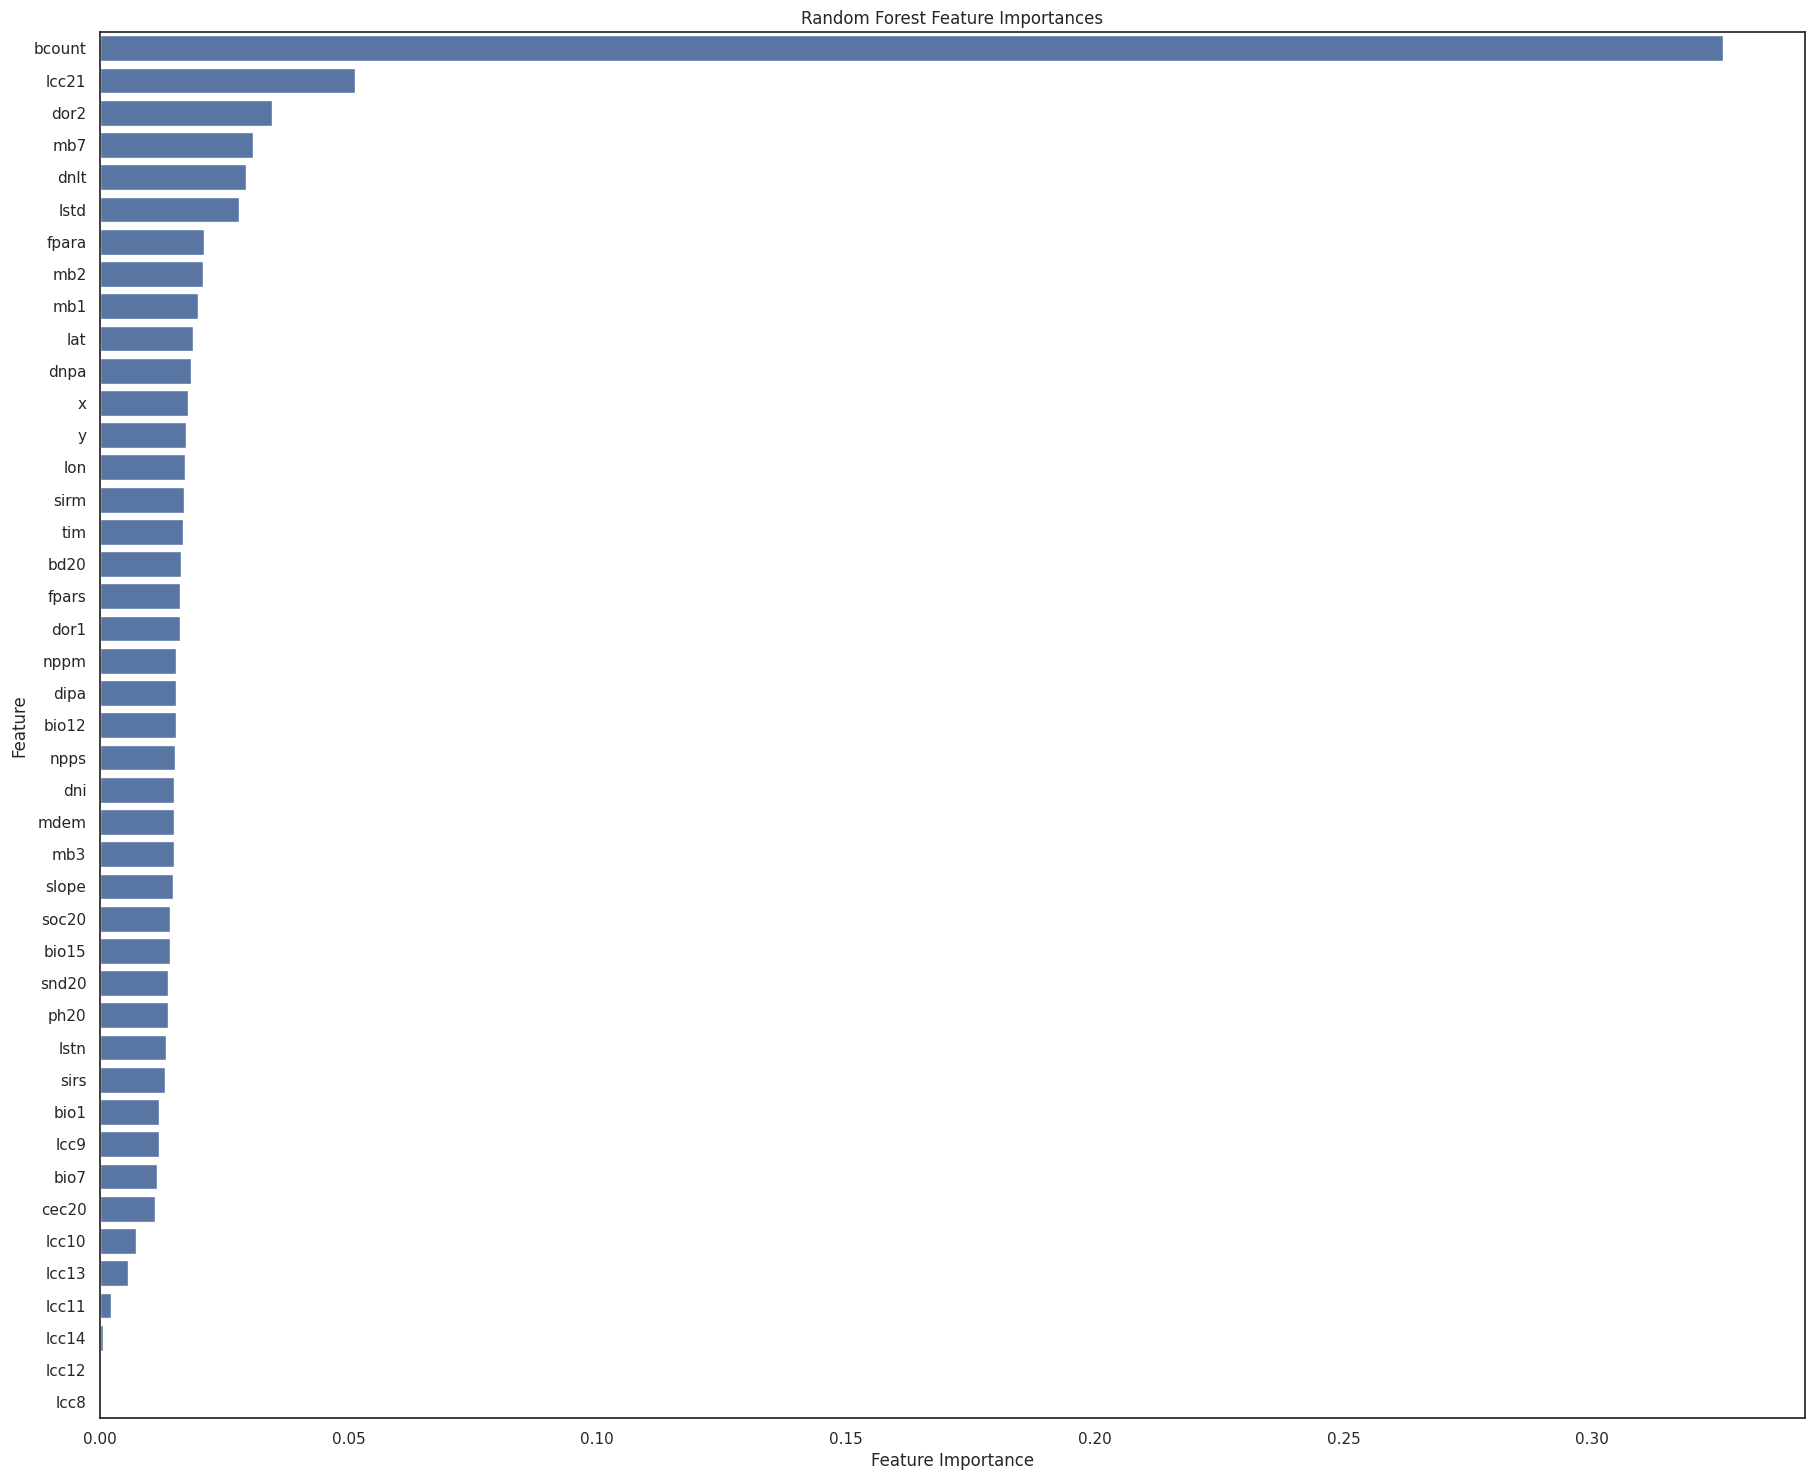

In [131]:
# Plot feature importances
plt.figure(figsize=(22, 18))
sns.barplot(y=feat_importances['Feature'], x=feat_importances['Importance'])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

In [138]:
# Saving the model as a file
import joblib

# Save the tuned Random Forest model to a file
joblib.dump(rf_model_tuned, 'rf_model_tuned.pkl')

['rf_model_tuned.pkl']

In [133]:
#Preprocess test set features
X_test = test_gdf.drop(columns=['subid'])
X_test_scaled = scaler.transform(X_test)


In [134]:

# Generate predicted probabilities for each class
test_probs = rf_model_tuned.predict_proba(X_test_scaled)

In [135]:
# Create submission Dataframe
submission_df = pd.DataFrame({
    'subid': test_gdf['subid'],
    'building_prob': test_probs[:, 0],
    'cropland_prob': test_probs[:, 1],
    'wcover_prob': test_probs[:, 2]
})


In [136]:
submission_df.head()

,subid,building_prob,cropland_prob,wcover_prob
0,1548905,0.080000,0.536667,0.383333
1,1548829,0.053333,0.410000,0.536667
2,1548811,0.026667,0.186667,0.786667
3,1548806,0.126667,0.586667,0.286667
4,1548798,0.093333,0.643333,0.263333


In [137]:
# Save the submission dataframe as csv file
submission_df.to_csv('submission.csv', index=False)